# Bank Marketing : Predictive learning
#### Author : Indra Yanto Simanihuruk

## 0. Work Environment Preparation

Install some needed libraries :

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import warnings
warnings.filterwarnings('ignore')

## 1. Data Introduction

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit. Link for the dataset : https://www.kaggle.com/henriqueyamahata/bank-marketing?select=bank-additional-names.txt

In [58]:
pd.get_option("display.max_columns")
pd.set_option("display.max_columns", None)
raw_df=pd.read_csv('D:\\Learning_python\\Final_Project\\bank-additional-full.csv',sep=';')
raw_df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1    999         0   
1      telephone   may         mon       149         1    999         0   
2      telephone   may         mon       226         1    999         0   
3      telephone   may         mon       151         1    999         0   
4      telephone   may         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri       334         1    999         0   
41184   cellular   nov         fri       383         1    999         0   
41185   cellular   nov         fri       189         2    999         0   
41186   cellular   nov         fri       442         1    999         0   
41187   cellular   nov         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1          93.994          -36.4      4.857   
1      nonexistent           1.1          93.994          -36.4      4.857   
2      nonexistent           1.1          93.994          -36.4      4.857   
3      nonexistent           1.1          93.994          -36.4      4.857   
4      nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

**About the data**

Data is ordered by date (from May 2008 to November 2010)

**Client information:**
   - age (numeric)
   - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   - default: has credit in default? (categorical: "no","yes","unknown")
   - housing: has housing loan? (categorical: "no","yes","unknown")
   - loan: has personal loan? (categorical: "no","yes","unknown")

**Related with the last contact of the current campaign:**
   - contact: contact communication type (categorical: "cellular","telephone") 
   - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
   - duration: last contact duration, in seconds (numeric). **Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.**

**Other Attributes:**:
  - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  - previous: number of contacts performed before this campaign and for this client (numeric)
  - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

**Social-Economy context attributes**:
  - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  - cons.price.idx: consumer price index - monthly indicator (numeric)     
  - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  - euribor3m: euribor 3 month rate - daily indicator (numeric)
  - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
  - y - has the client subscribed a term deposit? (binary: "yes","no")



**Background**

Nowadays, banks can make money with a lot of different ways, even though at the core they are still considered as lenders. Generally, they make money by borrowing it from the depositors, who are compensated later with a certain interest rate and security for their funds. Then, the borrowed money will be lent out to borrowers who need it at the moment. The borrowers however, are charged with higher interest rate than what is paid to the depositors. The difference between interest rate paid and interest rate received is often called as interest rate spead, where the banks gain profit from.

The main object of this research is a certain Portuguese bank institution who was trying to collect money from the depositors through direct marketing campaigns. In general, direct marketing campaign requires in-house or out-sourced call centres. Even though the information of sales cost are not provided, several articles said that it could put a considerable strain on the expense ratio of the product. In this case, the sales team of the bank contacted about 40000 customers randomly, while only 11% (around 4500) of them were willing to deposit their money.

By assuming one direct marketing call for one customer costs the company 2 dollars and profits them 50  dollars. It can be said that from 2000 customers contacted, the bank will gain profit of 7000 dollars in total, knowing that 11 in every 100 random calls result in successful sales. However, the bank soughted for some approaches that will help them conduct more effective marketing campaign with better conversion rate, and machine learning is one of the answers.

**Business Objective**

Providing more detail to previous statement, this research is carried out to identify customers who are more likely to subscribe and build a machine learning model that is be able to predict the probability of a certain customer become a depositor, in order to help the sales team conducting more effective marketing campaign or higher profit. Keep in mind that based on the previous example, 10% increase in customer rate will be followed by almost 16% increase in profit. Conversion rate is used as the key metrics related to the evaluation of machine learning model.

## 2. Data Pre-Processing and Analysis

In [59]:
df_desc=raw_df.isna().sum(axis=0).reset_index()
row_n,col_n=raw_df.shape
df_desc.columns=['Variable','Missing_values']
df_desc['Filling_Values (%)']=(row_n-df_desc['Missing_values'])*100/row_n
df_desc['Dtypes']=raw_df.dtypes.values
df_desc

Variable  Missing_values  Filling_Values (%)   Dtypes
0              age               0               100.0    int64
1              job               0               100.0   object
2          marital               0               100.0   object
3        education               0               100.0   object
4          default               0               100.0   object
5          housing               0               100.0   object
6             loan               0               100.0   object
7          contact               0               100.0   object
8            month               0               100.0   object
9      day_of_week               0               100.0   object
10        duration               0               100.0    int64
11        campaign               0               100.0    int64
12           pdays               0               100.0    int64
13        previous               0               100.0    int64
14        poutcome               0               100.0   object
15    emp.var.rate               0               100.0  float64
16  cons.price.idx               0               100.0  float64
17   cons.conf.idx               0               100.0  float64
18       euribor3m               0               100.0  float64
19     nr.employed               0               100.0  float64
20               y               0               100.0   object

In [60]:
raw_df.describe(include='all')

age     job  marital          education default housing  \
count   41188.00000   41188    41188              41188   41188   41188   
unique          NaN      12        4                  8       3       3   
top             NaN  admin.  married  university.degree      no     yes   
freq            NaN   10422    24928              12168   32588   21576   
mean       40.02406     NaN      NaN                NaN     NaN     NaN   
std        10.42125     NaN      NaN                NaN     NaN     NaN   
min        17.00000     NaN      NaN                NaN     NaN     NaN   
25%        32.00000     NaN      NaN                NaN     NaN     NaN   
50%        38.00000     NaN      NaN                NaN     NaN     NaN   
75%        47.00000     NaN      NaN                NaN     NaN     NaN   
max        98.00000     NaN      NaN                NaN     NaN     NaN   

         loan   contact  month day_of_week      duration      campaign  \
count   41188     41188  41188       41188  41188.000000  41188.000000   
unique      3         2     10           5           NaN           NaN   
top        no  cellular    may         thu           NaN           NaN   
freq    33950     26144  13769        8623           NaN           NaN   
mean      NaN       NaN    NaN         NaN    258.285010      2.567593   
std       NaN       NaN    NaN         NaN    259.279249      2.770014   
min       NaN       NaN    NaN         NaN      0.000000      1.000000   
25%       NaN       NaN    NaN         NaN    102.000000      1.000000   
50%       NaN       NaN    NaN         NaN    180.000000      2.000000   
75%       NaN       NaN    NaN         NaN    319.000000      3.000000   
max       NaN       NaN    NaN         NaN   4918.000000     56.000000   

               pdays      previous     poutcome  emp.var.rate  cons.price.idx  \
count   41188.000000  41188.000000        41188  41188.000000    41188.000000   
unique           NaN           NaN            3           NaN             NaN   
top              NaN           NaN  nonexistent           NaN             NaN   
freq             NaN           NaN        35563           NaN             NaN   
mean      962.475454      0.172963          NaN      0.081886       93.575664   
std       186.910907      0.494901          NaN      1.570960        0.578840   
min         0.000000      0.000000          NaN     -3.400000       92.201000   
25%       999.000000      0.000000          NaN     -1.800000       93.075000   
50%       999.000000      0.000000          NaN      1.100000       93.749000   
75%       999.000000      0.000000          NaN      1.400000       93.994000   
max       999.000000      7.000000          NaN      1.400000       94.767000   

        cons.conf.idx     euribor3m   nr.employed      y  
count    41188.000000  41188.000000  41188.000000  41188  
unique            NaN           NaN           NaN      2  
top               NaN           NaN           NaN     no  
freq              NaN           NaN           NaN  36548  
mean       -40.502600      3.621291   5167.035911    NaN  
std          4.628198      1.734447     72.251528    NaN  
min        -50.800000      0.634000   4963.600000    NaN  
25%        -42.700000      1.344000   5099.100000    NaN  
50%        -41.800000      4.857000   5191.000000    NaN  
75%        -36.400000      4.961000   5228.100000    NaN  
max        -26.900000      5.045000   5228.100000    NaN

Automatic data analysis such as dtale and sweetviz will be imported to facilitate the analysis process.

In [61]:
#Import Sweetviz
#import sweetviz as sv

In [62]:
#sweetviz_report = sv.analyze(raw_df,target_feat='y')
#sweetviz_report.show_html("sweetviz_report.html")

As told in the description, the dataset does not have any missing values. However, some unknown values do exist within the dataset. By looking at the sweetviz report, it is also found that the dataset has 12 duplicated rows and they are need to be dropped.

In [63]:
pp_df=raw_df[~raw_df.duplicated()]
pp_df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1    999         0   
1      telephone   may         mon       149         1    999         0   
2      telephone   may         mon       226         1    999         0   
3      telephone   may         mon       151         1    999         0   
4      telephone   may         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri       334         1    999         0   
41184   cellular   nov         fri       383         1    999         0   
41185   cellular   nov         fri       189         2    999         0   
41186   cellular   nov         fri       442         1    999         0   
41187   cellular   nov         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1          93.994          -36.4      4.857   
1      nonexistent           1.1          93.994          -36.4      4.857   
2      nonexistent           1.1          93.994          -36.4      4.857   
3      nonexistent           1.1          93.994          -36.4      4.857   
4      nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41176 rows x 21 columns]

To impute the missing values and learn the dataset, Each group of features will be analyzed. First, the target variable will be encoded and some functions related to Visualization process are created.

In [64]:
pp_df['y']=pp_df['y'].map({'no':0,'yes':1}) #encoded the target variable to mitigate analysis process

In [65]:
#Functions to facilitate Visualization process
def group_for_stack(item_var,df=pp_df):
  df_agg=df.groupby(by=item_var)['y'].agg(['count']).reset_index()
  df_agg.columns=[item_var,'count']
  df_agg['y_c']=df.groupby(by=item_var)['y'].agg(['sum']).reset_index()['sum']
  df_agg['per_y']=df_agg['y_c']*100/df_agg['count']
  df_agg['per_not']=(100-df_agg['per_y'])
  df_agg[item_var]=df_agg[item_var].astype('category')
  return df_agg
sns.set_style('darkgrid',{'grid.color':'white'})
sns.set_context('paper')
def plot_bar_with_line(item_var,df=pp_df):
  df_agg=group_for_stack(item_var,df=df)
  list_item_var=df_agg[item_var].to_list()
  x_ax=[x for x in range(len(list_item_var))]
  fig,ax=plt.subplots(figsize=(9,5))
  sns.barplot(x=x_ax,y=df_agg['count'].values,color='steelblue',alpha=0.8,zorder=1,ax=ax,label='Count').set(title=f'Bivariate analysis of {item_var} feature',xlabel='',ylabel='Count')
  ax2=ax.twinx()
  ax2.grid(False)
  sns.lineplot(x=x_ax,y=df_agg['per_y'].values,ax=ax2,color='k',linewidth=1.8,marker='o',zorder=5,label='y',markeredgecolor='white').set(ylabel='% Percent deposit taken (y)')
  ax.set_xticklabels(list_item_var)
  ax2.set_xticklabels(list_item_var)
  ax2.legend().set_visible(False)
  fig.legend(loc="upper left",bbox_to_anchor=(0,1),bbox_transform=ax.transAxes)
  for label in ax.get_xticklabels():
    label.set_ha("center")
    label.set_rotation(20)
def plot_hist_with_line(item_var,df=pp_df):
  df_agg=group_for_stack(item_var,df=df)
  fig,ax=plt.subplots()
  sns.histplot(data=df,x=item_var,color='steelblue',alpha=0.8,label='Count',ax=ax).set(title=f'Bivariate analysis of {item_var} feature',xlabel='',ylabel='Count')
  ax2=ax.twinx()
  ax2.grid(False)
  sns.lineplot(data=df_agg,x=item_var,y='per_y',ax=ax2,color='k',linewidth=1,marker='o',label='y',markeredgecolor='k').set(ylabel='% Percent deposit taken (y)')
  ax2.legend().set_visible(False)
  fig.legend(loc="upper left",bbox_to_anchor=(0,1),bbox_transform=ax.transAxes)
def hist_and_box(item_var,df=pp_df,sys='outlier',low=0.25,upp=0.75):
  fig,ax=plt.subplots(1,2,figsize=(9,5))
  sns.histplot(data=df,x=item_var,hue='y',ax=ax[0],multiple='stack',kde=True)
  sns.boxplot(data=df,y=item_var,ax=ax[1])
  print('Description :')
  print(f'Minimum : {df[item_var].min()}')
  print(f'Maximum : {df[item_var].max()}')
  print(f'Mean: {df[item_var].mean()}')
  print(f'Median : {df[item_var].median()}')
  print(f'Q1 : {df[item_var].quantile(0.25)}')
  print(f'Q3 : {df[item_var].quantile(0.75)}')
  if sys=='outlier':
    q1=df[item_var].quantile(low)
    q3=df[item_var].quantile(upp)
    iqr=q3-q1
    df_save=df[(df[item_var]<q1-1.5*iqr)|(df[item_var]>q3+1.5*iqr)]
    print(f'outlier total amount :{df_save.shape[0]}')
    print(f'outlier amount for y=1 :{df_save[df_save.y==1].shape[0]}')
  if sys=='range':
    df_save=df[(df[item_var]>low)&(df[item_var]<upp)]
    print(f'total amount of rows with range from {low} to {upp} :{df_save.shape[0]}')
    print(f'total amount of rows y==1 :{df_save[df_save.y==1].shape[0]}')
  fig.suptitle(f'Bivariate analysis of {item_var} feature')
def stacked_analysis(item_vars,df=pp_df):
  df_agg=df.groupby(by=item_vars).y.count().reset_index()
  df_agg=df_agg.set_index(item_vars[0])
  df_sum_per=pp_df.groupby(by=item_vars[0]).y.count().reset_index()
  df_sum_per=df_sum_per.set_index(item_vars[0])
  df_agg['pct']=df_agg['y']*100/df_sum_per['y']
  pvt_df=pd.pivot_table(df_agg,index=item_vars[0],columns=item_vars[-1],values='pct')
  fig,ax=plt.subplots()
  pvt_df.plot(kind='bar',ax=ax,stacked=True,title=f'Bivariate analysis of {item_vars[0]} and {item_vars[1]}')
  ax.legend(loc='upper left', bbox_to_anchor=(1, 1),title=item_vars[1])

### 2.1 Target Variable y

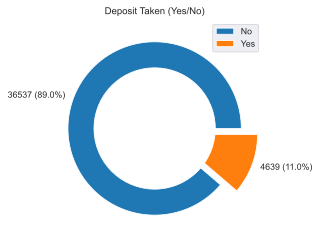

In [66]:
df_agg=group_for_stack('y')
data_per = df_agg['count'].values
data_persum=data_per/(sum(data_per))
explode = np.zeros(len(data_per))
explode[1]=0.2
explode=tuple(explode)
plt.pie(data_persum, explode = explode, labels = [f'{j} ({round(i,2)*100}%)' for i,j in zip(list(data_persum),list(data_per))])
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Deposit Taken (Yes/No)')
plt.legend(labels=['No','Yes'])
plt.savefig('demo.png',dpi=300, transparent=True)

From the dataset, one can observe that among all client that had been contacted before , only 11% clients who were willing to subscribe for a term deposit. Since the imbalance is found to be very high, AUC score is more preferred for evaluating the machine learning model rather than the accuracy.

### 2.2 Client Information Attributes

age, job, marital, education, default, housing, loan are features which identified as the Client Information Attributes. Among all of them, job, marital, education, default, housing, and loan have some values enlisted as unknown. Below analysis is carried out not only to figure out which part of the clients who has high probability to subscribe, but also to identify how to treat those unknown values.

To begin with, age is the only numerical features in client information attributes and it doesn't have any missing values.

Description :
Minimum : 17
Maximum : 98
Mean: 40.02380027200311
Median : 38.0
Q1 : 32.0
Q3 : 47.0
outlier total amount :468
outlier amount for y=1 :221


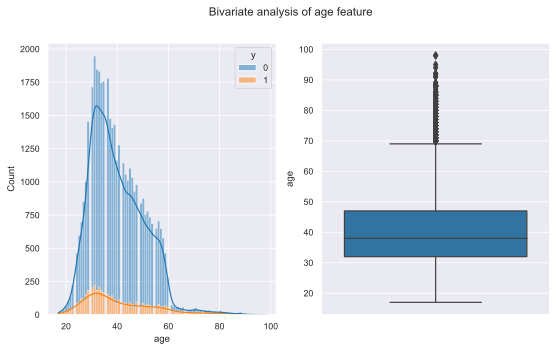

In [67]:
hist_and_box('age',sys='outlier')

Even though it doesn't have any missing values, it does have 468 rows identified as the outliers. Dropping all those rows is seen as bad decision because half of them have y values of 1, indicating that clients whose age bigger than 69 are very likely to subcribe. For now, this feature will be kept as it is.

In [68]:
#function to cluster age for visualization
def cluster_age(x):
  if x >= 17 and x<=30:
    return '17-30'
  elif x>30 and x<=43:
    return '31-43'
  elif x>43 and x<=56:
    return '44-56'
  elif x>56 and x<=69:
    return '57-69'
  elif x>69:
    return '>69'

In [69]:
df_1=pp_df.copy()
#df_2 for visualization only
df_2=pp_df.copy()
df_2['age']=df_2['age'].apply(lambda x:cluster_age(x))

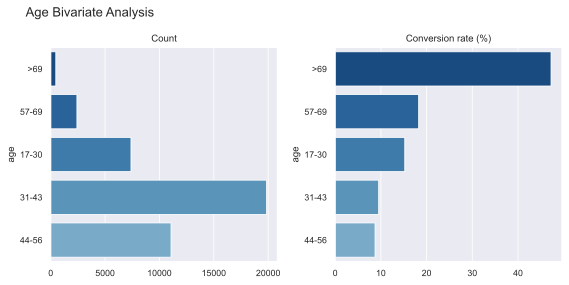

In [70]:
sns.set_style('darkgrid',{'grid.color':'white'})
sns.set_context('paper')
df_agg_age=group_for_stack('age',df=df_2)
df_agg_age=df_agg_age.sort_values(by='per_y')
fig,ax=plt.subplots(1,2,figsize=(8,4))
plt.suptitle('Age Bivariate Analysis', x=0.05, ha='left', fontsize=13)
pal=sns.color_palette("Blues_r",9)
sns.barplot(data=df_agg_age,y='age',x='count',ax=ax[0],palette=pal,order=df_agg_age.sort_values('per_y',ascending=False).age).set(title='Count',xlabel='')
sns.barplot(data=df_agg_age,y='age',x='per_y',ax=ax[1],palette=pal,order=df_agg_age.sort_values('per_y',ascending=False).age).set(title='Conversion rate (%)',xlabel='')
fig.tight_layout()

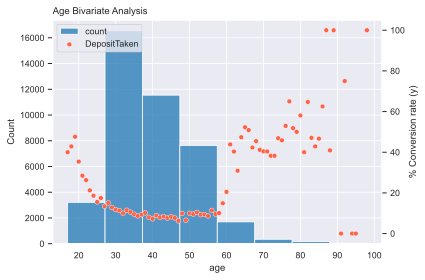

In [71]:
fig,ax=plt.subplots()
df_agg_age2=group_for_stack('age',df=df_1)
sns.histplot(data=pp_df,x='age',bins=8,ax=ax,label='count')
ax2=ax.twinx()
ax2.grid(False)
sns.scatterplot(data=df_agg_age2,x='age',y='per_y',ax=ax2,color='#FF6347',label='DepositTaken').set(ylabel='% Conversion rate (y)')
ax2.legend().set_visible(False)
fig.legend(loc="upper left",bbox_to_anchor=(0,1),bbox_transform=ax.transAxes)
plt.title('Age Bivariate Analysis',x=0,loc='left')
plt.tight_layout()
#plt.savefig('age.png',dpi=1000)

Based on two graphs above, one can observe that younger clients are more likely to subscribe than the elders, as the conversion rate constantly decreases the older the client is. Between 40 and 60, the conversion rate tends to be stable, even though it begins to raise again for age beyond 60. In addition, there is high degree of noise found in the conversion rate distribution for clients whose age are higher than 60. It is reasonable though, considering that the amount of clients with that age is pretty low.

The next feature to be analyzed is marital . It describes the marital status of each clients, which values consist of divorced, married, single, and unknown.

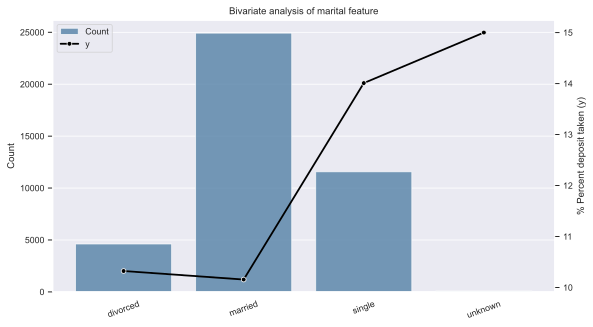

In [72]:
plot_bar_with_line('marital')

Even though single and unknown is found having the highest probability to subscribe, the difference among all categories in the term of probability is actually not that much (only 5 percent). Thus, one can say that nothing valuable can be acquired from this feature. For now, this variable will still be included and unknown values will be imputed as married. This approach use age as its basis (age has the highest correlation to marital based on sweetviz report) and by looking at the boxplot of marital vs age, the age distribution of unknown is found relatively similar to the age distribution of married. The mode of this feature is also married, which increases the validity of this approach.

In [73]:
group_for_stack('marital')

marital  count   y_c      per_y    per_not
0  divorced   4611   476  10.323140  89.676860
1   married  24921  2531  10.156093  89.843907
2    single  11564  1620  14.008993  85.991007
3   unknown     80    12  15.000000  85.000000

<AxesSubplot:xlabel='age', ylabel='marital'>

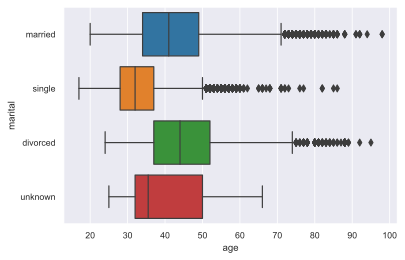

In [74]:
sns.boxplot(data=pp_df,y='marital',x='age')

In [75]:
df_1['marital']=pp_df['marital'].apply(lambda x: 'married' if x=='unknown' else x)
df_2['marital']=pp_df['marital'].apply(lambda x: 'married' if x=='unknown' else x)

Result of feature engineering on marital variable :

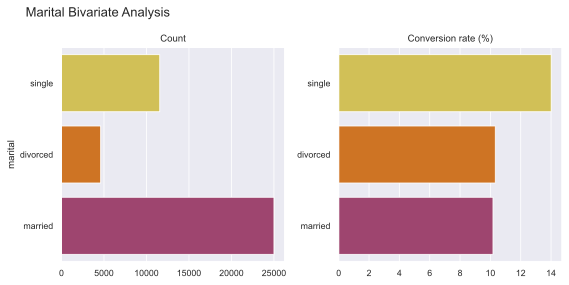

In [76]:
df_agg_marital=group_for_stack('marital',df=df_2)
fig,ax=plt.subplots(1,2,figsize=(8,4))
plt.suptitle('Marital Bivariate Analysis', x=0.05, ha='left', fontsize=13)
pal=sns.color_palette("CMRmap_r",4)
sns.barplot(data=df_agg_marital,y='marital',x='count',ax=ax[0],palette=pal,order=df_agg_marital.sort_values('per_y',ascending=False).marital).set(title='Count',xlabel='')
sns.barplot(data=df_agg_marital,y='marital',x='per_y',ax=ax[1],palette=pal,order=df_agg_marital.sort_values('per_y',ascending=False).marital).set(title='Conversion rate (%)',ylabel='',xlabel='')
fig.tight_layout()

The next features to be discussed are education and job. Based on the results of sweetviz analysis, it is found that both of these features are providing information (highest entropy coefficient) on each other. Moreover, it is also found that age has pretty high correlation to both of them. These all features will be analyzed one by one to determine whether it is better to keep the unknown value as it is.

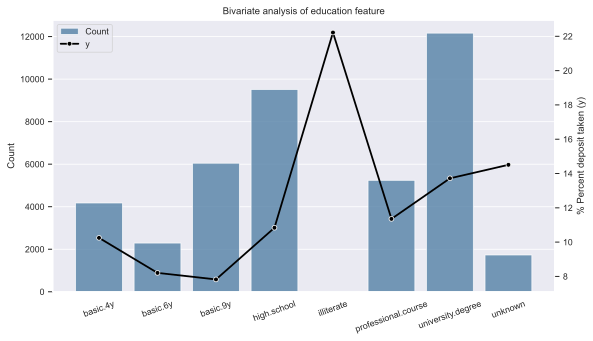

In [77]:
plot_bar_with_line('education')

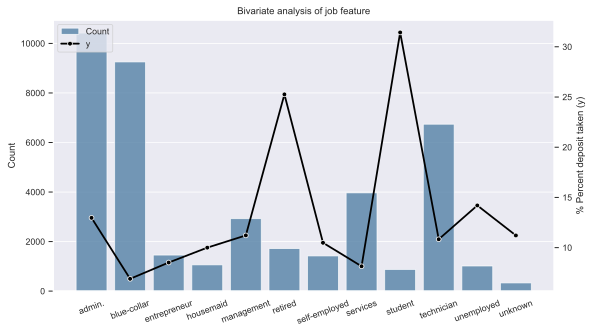

In [78]:
plot_bar_with_line('job')

It's difficult to identify which categories of education have higher chance to subscribe since there aren't any big differences in term of percent deposit taken. By contrast, the job feature is able to provide clearer information about the target variable y as retired and student are found having relatively higher chances to subcribe for a deposit. This finding supports the previous insight that younger and elder people tend to have higher possibility to subcribe (student and retired have the smallest and highest age distribution).

In [79]:
group_for_stack('education')

education  count   y_c      per_y    per_not
0             basic.4y   4176   428  10.249042  89.750958
1             basic.6y   2291   188   8.206024  91.793976
2             basic.9y   6045   473   7.824648  92.175352
3          high.school   9512  1031  10.838940  89.161060
4           illiterate     18     4  22.222222  77.777778
5  professional.course   5240   595  11.354962  88.645038
6    university.degree  12164  1669  13.720816  86.279184
7              unknown   1730   251  14.508671  85.491329

In [80]:
group_for_stack('job')

job  count   y_c      per_y    per_not
0          admin.  10419  1351  12.966695  87.033305
1     blue-collar   9253   638   6.895061  93.104939
2    entrepreneur   1456   124   8.516484  91.483516
3       housemaid   1060   106  10.000000  90.000000
4      management   2924   328  11.217510  88.782490
5         retired   1718   434  25.261932  74.738068
6   self-employed   1421   149  10.485574  89.514426
7        services   3967   323   8.142173  91.857827
8         student    875   275  31.428571  68.571429
9      technician   6739   730  10.832468  89.167532
10     unemployed   1014   144  14.201183  85.798817
11        unknown    330    37  11.212121  88.787879

[Text(0.5, 1.0, 'age vs job')]

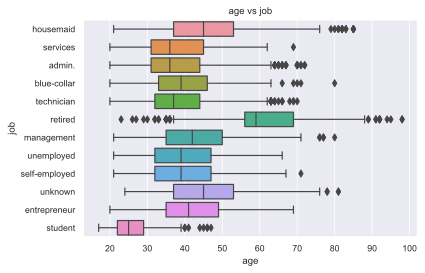

In [81]:
 sns.boxplot(data=pp_df,y='job',x='age').set(title='age vs job')

The age distribution of unknown job overlaps with almost all type of jobs (exc retired and student). Thus, it's very difficult to impute the unknown values based on age distribution only if we need to. Other alternative is by using education to predict the unknown values, which will be discussed in the next cell.

[Text(0.5, 1.0, 'education vs job')]

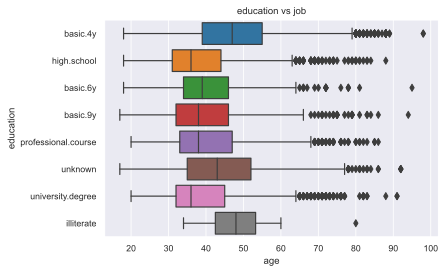

In [82]:
sns.boxplot(data=pp_df,y='education',x='age').set(title='education vs job')

Similar to job, the age distribution of unknown education also overlaps with all types of education.

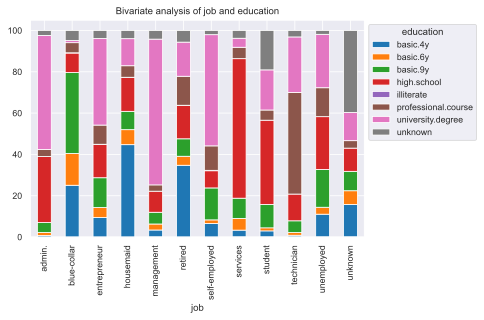

In [83]:
stacked_analysis(['job','education'])

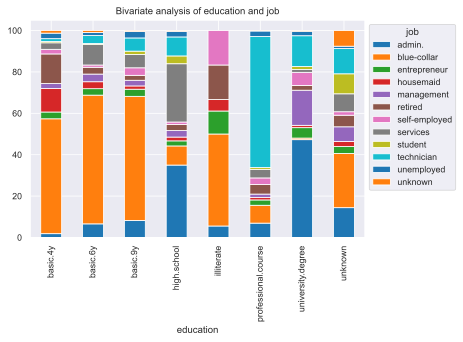

In [84]:
stacked_analysis(['education','job'])

After all the analysis, it is found that unknown values both in job and education do not have any distinct characteristics. That's why they will be treated as independent category. However, illiterate and unknown in education features are grouped into one category other since the amount of clients who are illiterate is very low. This grouping will result in less encoded column thus faster data processing.

In [85]:
#unknown job
df_1['job']=pp_df['job']
df_2['job']=pp_df['job']

In [86]:
#unknown education
df_1['education']=pp_df['education'].apply(lambda x: 'other' if (x=='unknown' or x=='illiterate') else x)
df_2['education']=pp_df['education'].apply(lambda x: 'other' if (x=='unknown' or x=='illiterate') else x)

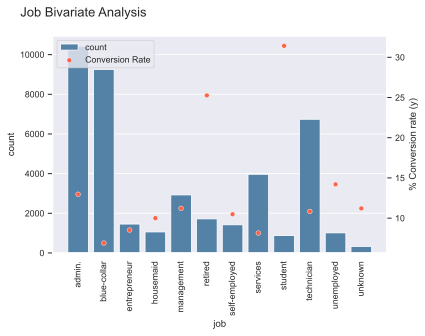

In [87]:
fig,ax=plt.subplots()
df_agg_job=group_for_stack('job',df=df_2)
sns.barplot(data=df_agg_job,x='job',y='count',color='steelblue',label='count')
ax2=ax.twinx()
ax2.grid(False)
sns.scatterplot(data=df_agg_job,x='job',y='per_y',ax=ax2,color='#FF6347',label='Conversion Rate').set(ylabel='% Conversion rate (y)')
ax2.legend().set_visible(False)
fig.legend(loc="upper left",bbox_to_anchor=(0,1),bbox_transform=ax.transAxes)
plt.suptitle('Job Bivariate Analysis', x=0.05, ha='left', fontsize=13)
for label in ax.get_xticklabels():
    label.set_ha("center")
    label.set_rotation(90)

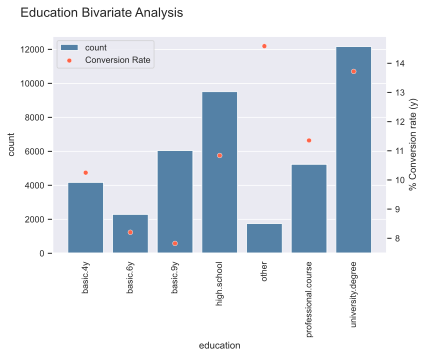

In [88]:
fig,ax=plt.subplots()
df_agg_edu=group_for_stack('education',df=df_2)
sns.barplot(data=df_agg_edu,x='education',y='count',color='steelblue',label='count')
ax2=ax.twinx()
ax2.grid(False)
sns.scatterplot(data=df_agg_edu,x='education',y='per_y',ax=ax2,color='#FF6347',label='Conversion Rate').set(ylabel='% Conversion rate (y)')
ax2.legend().set_visible(False)
fig.legend(loc="upper left",bbox_to_anchor=(0,1),bbox_transform=ax.transAxes)
plt.suptitle('Education Bivariate Analysis', x=0.05, ha='left', fontsize=13)
for label in ax.get_xticklabels():
    label.set_ha("center")
    label.set_rotation(90)

Next features that will be discussed are related to the financial situation of each client, such as whether the client has a default credit card or even a loan.



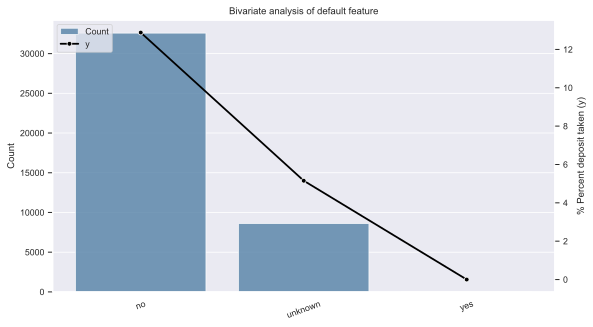

In [89]:
plot_bar_with_line('default')

According to sweetviz report, default does not correlate with other features, hence it will be very difficult to impute the unknown values. For now, unknown and yes will be merged as other since there are only 3 rows identified as yes. Based on above result, one can observe clients who don't have default credit card are more likely to subscribe for a term deposit.

In [90]:
df_1['default']=pp_df['default'].apply(lambda x:'other' if (x=='yes' or x=='unknown') else x)
df_2['default']=pp_df['default'].apply(lambda x:'other' if (x=='yes' or x=='unknown') else x)

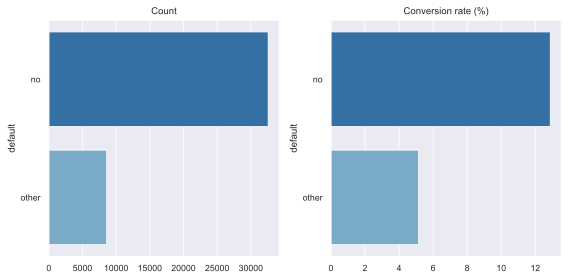

In [91]:
df_agg_dft=group_for_stack('default',df=df_2)
df_agg_dft=df_agg_dft.sort_values(by='per_y')
fig,ax=plt.subplots(1,2,figsize=(8,4))
#plt.suptitle('Default Bivariate Analysis', x=0.05, ha='left', fontsize=13)
pal=sns.color_palette("Blues_r",3)
sns.barplot(data=df_agg_dft,y='default',x='count',ax=ax[0],palette=pal,order=df_agg_dft.sort_values('per_y',ascending=False).default).set(title='Count',xlabel='')
sns.barplot(data=df_agg_dft,y='default',x='per_y',ax=ax[1],palette=pal,order=df_agg_dft.sort_values('per_y',ascending=False).default).set(title='Conversion rate (%)',xlabel='')
fig.tight_layout()
plt.savefig('default.png',dpi=300, transparent=True)

Last features for this Client information attributes are housing and loan

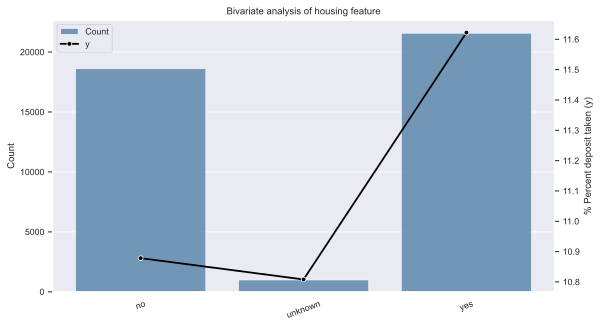

In [92]:
plot_bar_with_line('housing')

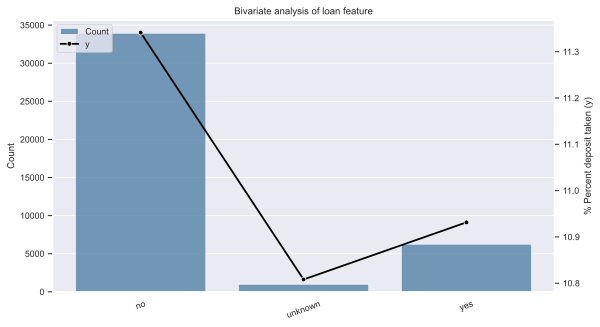

In [93]:
plot_bar_with_line('loan')

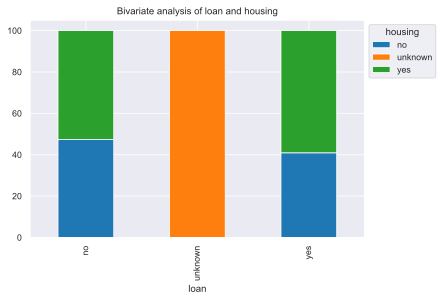

In [94]:
stacked_analysis(['loan','housing'])

From the bivariate analysis graph of loan and housing one can observe there are barely significant differences among all values in term of percent deposit taken. As a result, these 2 columns will be merged with conditions below, to generate simpler dataset.

In [95]:
def loan_housing(x):
  if x['loan']=='yes' or x['housing']=='yes':
    return 'yes'
  elif x['loan']=='no' and x['housing']=='no':
    return 'no'
  elif x['loan']=='unknown':
    return 'unknown'

In [96]:
df_1['loan']=df_1.apply(loan_housing,axis=1)
df_2['loan']=df_2.apply(loan_housing,axis=1)

In [97]:
df_1=df_1.drop(['housing'],axis=1)
df_2=df_2.drop(['housing'],axis=1)

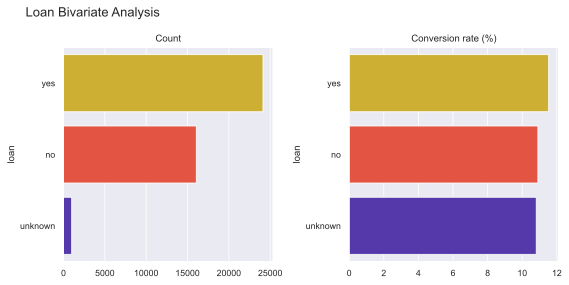

In [98]:
df_agg_loan=group_for_stack('loan',df=df_2)
df_agg_loan=df_agg_loan.sort_values(by='per_y')
fig,ax=plt.subplots(1,2,figsize=(8,4))
plt.suptitle('Loan Bivariate Analysis', x=0.05, ha='left', fontsize=13)
pal=sns.color_palette("CMRmap_r",3)
sns.barplot(data=df_agg_loan,y='loan',x='count',ax=ax[0],palette=pal,order=df_agg_loan.sort_values('per_y',ascending=False).loan).set(title='Count',xlabel='')
sns.barplot(data=df_agg_loan,y='loan',x='per_y',ax=ax[1],palette=pal,order=df_agg_loan.sort_values('per_y',ascending=False).loan).set(title='Conversion rate (%)',xlabel='')
fig.tight_layout()

For this new engineered variable, it still seems that there aren't any  significant differences among all categories in term of conversion rate

### 2.3 Current Contact Attributes
This section will analyze some variables related to the contact attributes such as contact, month, day_of_week, and duration. In addition, there aren't any unknown values in these features.

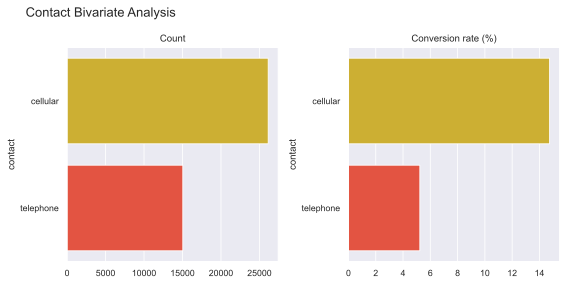

In [99]:
df_agg_contact=group_for_stack('contact',df=df_2)
df_agg_contact=df_agg_contact.sort_values(by='per_y')
fig,ax=plt.subplots(1,2,figsize=(8,4))
plt.suptitle('Contact Bivariate Analysis', x=0.05, ha='left', fontsize=13)
pal=sns.color_palette("CMRmap_r",3)
sns.barplot(data=df_agg_contact,y='contact',x='count',ax=ax[0],palette=pal,order=df_agg_contact.sort_values('per_y',ascending=False).contact).set(title='Count',xlabel='')
sns.barplot(data=df_agg_contact,y='contact',x='per_y',ax=ax[1],palette=pal,order=df_agg_contact.sort_values('per_y',ascending=False).contact).set(title='Conversion rate (%)',xlabel='')
fig.tight_layout()

It is evident from the bivariate analysis graph of contact feature that client with cellular has slightly more likelihood to subscribe rather than the telephone one. 

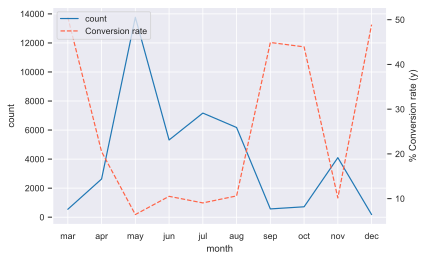

In [100]:
df_agg_mth=group_for_stack('month',df=df_2)
def month_to_num(x):
    if x=='mar':
        return 3
    elif x=='apr':
        return 4
    elif x=='may':
        return 5
    elif x=='jun':
        return 6
    elif x=='jul':
        return 7
    elif x=='aug':
        return 8
    elif x=='sep':
        return 9
    elif x=='oct':
        return 10
    elif x=='nov':
        return 11
    elif x=='dec':
        return 12
df_agg_mth['num_mth']=df_agg_mth['month'].apply(lambda x:month_to_num(x))
df_agg_mth['num_mth']=df_agg_mth.num_mth.astype(float)
df_agg_mth=df_agg_mth.sort_values('num_mth')
fig,ax=plt.subplots()
sns.lineplot(data=df_agg_mth,x='num_mth',y='count',label='count',ax=ax).set(xlabel='month',ylabel='count')
ax2=ax.twinx()
sns.lineplot(data=df_agg_mth,x='num_mth',y='per_y',label='Conversion rate',color='#FF6347',ax=ax2,linestyle='--').set(ylabel='% Conversion rate (y)')
ax2.grid(False)
ax2.legend().set_visible(False)
ax.legend().set_visible(False)
fig.legend(loc="upper left",bbox_to_anchor=(0,1),bbox_transform=ax.transAxes)
ax.set_xticks([x for x in range(3,13)],labels=['mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.savefig('month.png',dpi=300, transparent=True)

In [101]:
df_1['month']=pp_df['month']
df_2['month']=pp_df['month']

Out of my expectation, month provides lots of useful information in this dataset. The dataset was recorded from May 2008 to November 2010. From the count lineplot, one can observe that May, June, July and August are the months in which the bank does most of their campaigns. However, the conversion rate line reaches its peak during March, September, October, and December.

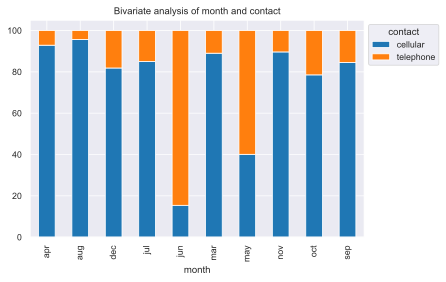

In [102]:
stacked_analysis(['month','contact'])

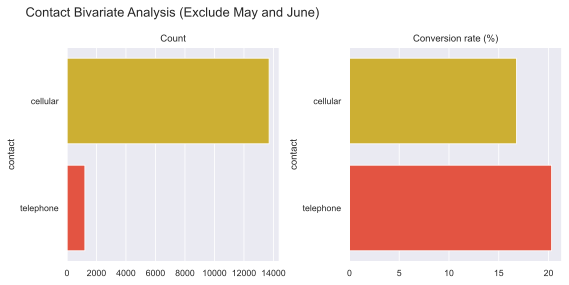

In [103]:
pp_df_check=pp_df[(pp_df['month']!='may') & (pp_df['month']!='jun') & (pp_df['month']!='jul')]
df_agg_contact=group_for_stack('contact',df=pp_df_check)
df_agg_contact=df_agg_contact.sort_values(by='per_y')
fig,ax=plt.subplots(1,2,figsize=(8,4))
plt.suptitle('Contact Bivariate Analysis (Exclude May and June)', x=0.05, ha='left', fontsize=13)
pal=sns.color_palette("CMRmap_r",3)
sns.barplot(data=df_agg_contact,y='contact',x='count',ax=ax[0],palette=pal).set(title='Count',xlabel='')
sns.barplot(data=df_agg_contact,y='contact',x='per_y',ax=ax[1],palette=pal).set(title='Conversion rate (%)',xlabel='')
fig.tight_layout()

In [104]:
pp_df_check=pp_df.head(12300)

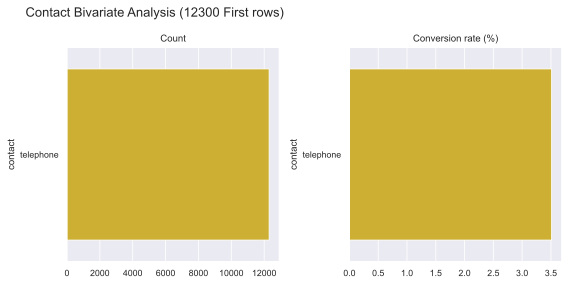

In [105]:
df_agg_contact=group_for_stack('contact',df=pp_df_check)
df_agg_contact=df_agg_contact.sort_values(by='per_y')
fig,ax=plt.subplots(1,2,figsize=(8,4))
plt.suptitle('Contact Bivariate Analysis (12300 First rows)', x=0.05, ha='left', fontsize=13)
pal=sns.color_palette("CMRmap_r",3)
sns.barplot(data=df_agg_contact,y='contact',x='count',ax=ax[0],palette=pal).set(title='Count',xlabel='')
sns.barplot(data=df_agg_contact,y='contact',x='per_y',ax=ax[1],palette=pal).set(title='Conversion rate (%)',xlabel='')
fig.tight_layout()

Another interesting finding is that telephone-contacts dominates the direct campaigns in june and may. This may tell why telephone has relatively lower likelihood to subscribe since june and may have lower conversation rate than other months. 

However, for the processed data train, this feature will be dropped due to several reasons:

- It's not reasonable to include contact in the train data, since normally, the contact type won't affect whether the clients would subscribe for a term deposit.
- The first 12300 rows are the first 12300 clients who were contacted during the early months such as may, june, july. Oddly enough, they are all contacted with telephone, and only results in 3.5 conversion rate. Total rows with telephone are around 15000, so those 123000 rows have already covered  more than 80 percent of it. This phenomenon is considered as anomaly, as the mean of conversion rate for telephone and cellular for all months except may and june is pretty similar.

Month is quite tricky since it is highly associated to several features such as Sosial Economic attributes, contact, pdays, and so on. This phenomenon could be problems in data processing since it will induce high correlation to other features, forcing us to be aware of overfitting. For now, this feature will be kept in the dataset and also be one-hot-encoded. Moreover, above figure depicts that some months such as march, october, september, and december, do affect the willingness to subscribe significantly. The reason why may relate to the interest rate or economy condition during the time, since months are highly associated with sos-con attributes.

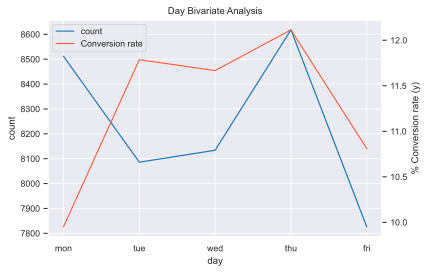

In [106]:
df_agg_day=group_for_stack('day_of_week',df=df_2)
def day_to_num(x):
    if x=='mon':
        return 1
    elif x=='tue':
        return 2
    elif x=='wed':
        return 3
    elif x=='thu':
        return 4
    elif x=='fri':
        return 5
df_agg_day['num_day']=df_agg_day['day_of_week'].apply(lambda x:day_to_num(x))
df_agg_day['num_day']=df_agg_day.num_day.astype(float)
df_agg_day=df_agg_day.sort_values('num_day')
fig,ax=plt.subplots()
sns.lineplot(data=df_agg_day,x='num_day',y='count',label='count',ax=ax).set(title='Day Bivariate Analysis',xlabel='day',ylabel='count')
ax2=ax.twinx()
sns.lineplot(data=df_agg_day,x='num_day',y='per_y',label='Conversion rate',color='#FF6347',ax=ax2).set(ylabel='% Conversion rate (y)')
ax2.grid(False)
ax2.legend().set_visible(False)
ax.legend().set_visible(False)
fig.legend(loc="upper left",bbox_to_anchor=(0,1),bbox_transform=ax.transAxes)
ax.set_xticks([x for x in range(1,6)],labels=['mon','tue','wed','thu','fri'])

Overall, there are barely any differences for conversion rate among all days. However, one can observe monday has relatively lower conversion rate compared to others.

Description :
Minimum : 0
Maximum : 4918
Mean: 258.3158150378861
Median : 180.0
Q1 : 102.0
Q3 : 319.0
outlier total amount :2963
outlier amount for y=1 :1526


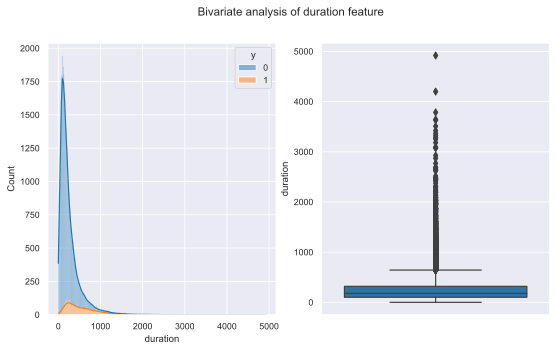

In [107]:
hist_and_box('duration')

It's stated previously that duration is highly associated to the target variable y, where the longer the duration, the higher probability to subcribe will be. However, including this variable in the train dataset isn't considered as a good approach since it's not realistic for knowing the duration of the last contact/call as models are built to predict the outcome even before the last call are conducted. As a result, this feature will be not included in the train dataset.

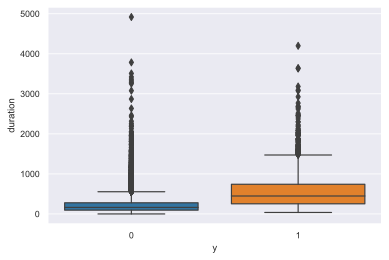

In [108]:
sns.boxplot(data=pp_df,x='y',y='duration')
plt.savefig('duration.png',dpi=300, transparent=True)

In [109]:
df_1=df_1.drop(['duration'],axis=1)
df_2=df_2.drop(['duration'],axis=1)

### 2.4 Other attributes

In this section, other attributes such as campaign, previous, pdays, poutcome will be discussed. To begin with, it has been stated before that some clients were contacted multiple times before deciding to subcribe for a term deposit. In the dataset, the total amount of calls/contacts is recorder as campaign (were done on the current campaign)

Since the distribution of campaign are very diverse, the values will be clustered. Based on below graphs, one can observe that as the number of calls is getting higher, the probability of subscribing are actually decreasing

In [110]:
def cluster_campaign(x):
  if x>=1 and x<=3:
    return '1-3'
  elif x>3 and x<=7:
    return '4-7'
  elif x>8 and x<=10:
    return '8-10'
  elif x>10:
    return '>10'

In [111]:
df_1['campaign']=pp_df['campaign']
df_2['campaign']=pp_df['campaign'].apply(lambda x:cluster_campaign(x))

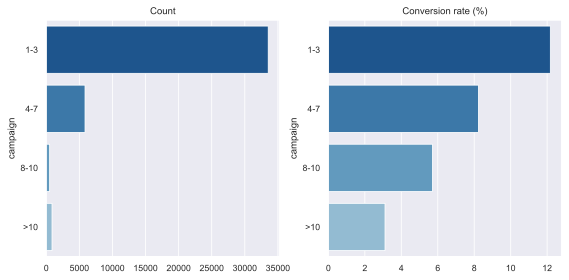

In [112]:
df_agg_campaign=group_for_stack('campaign',df=df_2)
df_agg_campaign=df_agg_campaign.sort_values(by='per_y')
fig,ax=plt.subplots(1,2,figsize=(8,4))
#plt.suptitle('Campaign Bivariate Analysis', x=0.05, ha='left', fontsize=13)
pal=sns.color_palette("Blues_r",6)
sns.barplot(data=df_agg_campaign,y='campaign',x='count',ax=ax[0],palette=pal,order=df_agg_campaign.sort_values('per_y',ascending=False).campaign).set(title='Count',xlabel='')
sns.barplot(data=df_agg_campaign,y='campaign',x='per_y',ax=ax[1],palette=pal,order=df_agg_campaign.sort_values('per_y',ascending=False).campaign).set(title='Conversion rate (%)',xlabel='')
fig.tight_layout()
plt.savefig('campaign.png',dpi=300, transparent=True)

Sweetviz finds that previous, poutcome, and pdays are highly associated to each other. This findings is actually quite reasonable, since all of them tell information regarding the previous campaign. Keep in mind that 999 in pdays indicating the clients who weren't contacted before

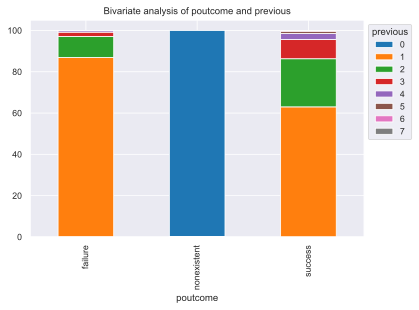

In [113]:
pp_df['pdays_enc']=pp_df['pdays'].apply(lambda x:'Contacted' if x<999 else 'Not_Contacted') #encode pdays 999 as not contacted previously
stacked_analysis(['poutcome','previous'])

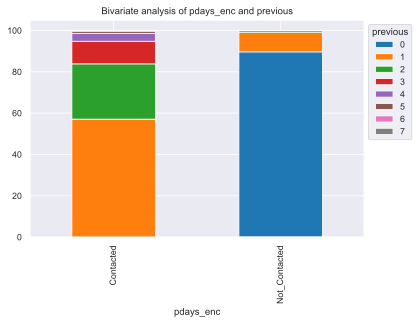

In [114]:
stacked_analysis(['pdays_enc','previous'])

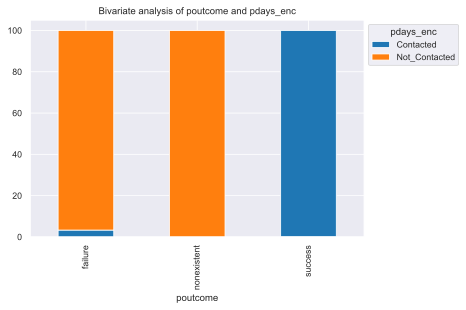

In [115]:
stacked_analysis(['poutcome','pdays_enc'])

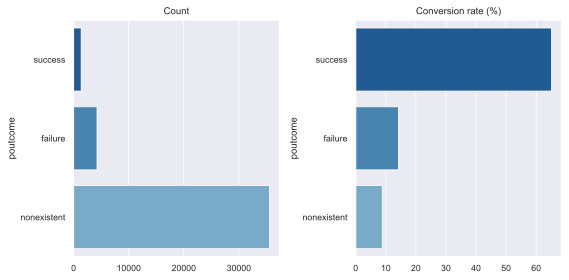

In [116]:
df_agg_poutcome=group_for_stack('poutcome',df=df_2)
df_agg_poutcome=df_agg_poutcome.sort_values(by='per_y')
fig,ax=plt.subplots(1,2,figsize=(8,4))
#plt.suptitle('Campaign Bivariate Analysis', x=0.05, ha='left', fontsize=13)
pal=sns.color_palette("Blues_r",5)
sns.barplot(data=df_agg_poutcome,y='poutcome',x='count',ax=ax[0],palette=pal,order=df_agg_poutcome.sort_values('per_y',ascending=False).poutcome).set(title='Count',xlabel='')
sns.barplot(data=df_agg_poutcome,y='poutcome',x='per_y',ax=ax[1],palette=pal,order=df_agg_poutcome.sort_values('per_y',ascending=False).poutcome).set(title='Conversion rate (%)',xlabel='')
fig.tight_layout()
plt.savefig('poutcome.png',dpi=300, transparent=True)

Since poutcome shows significant impact to the target variable  have go, it will be more reasonable to include only poutcome rather than pdays and previous in the train dataset as all of them are highly associated to each other. 

In [117]:
df_1=df_1.drop(['pdays','previous'],axis=1)
df_2=df_2.drop(['pdays','previous'],axis=1)

### 2.4 Social-Economic attributes

The social-economic attributes consists of 5 features such as emp.var.rate, cons.price.idx, cons_conf_idx, euribor3m, and nr.employed. Keep in mind that there are no missing values in these features.

**emp.var.rate**

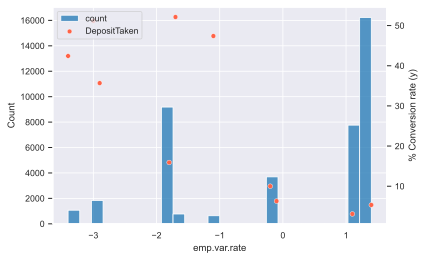

In [118]:
fig,ax=plt.subplots()
df_agg_empvar=group_for_stack('emp.var.rate',df=df_1)
sns.histplot(data=pp_df,x='emp.var.rate',ax=ax,label='count')
ax2=ax.twinx()
ax2.grid(False)
sns.scatterplot(data=df_agg_empvar,x='emp.var.rate',y='per_y',ax=ax2,color='#FF6347',label='DepositTaken').set(ylabel='% Conversion rate (y)')
ax2.legend().set_visible(False)
fig.legend(loc="upper left",bbox_to_anchor=(0,1),bbox_transform=ax.transAxes)
#plt.suptitle('Employee Variation Rate Bivariate Analysis', x=0.05, ha='left', fontsize=13)
plt.savefig('empvar.png',dpi=300, transparent=True)

**cons.price.idx**

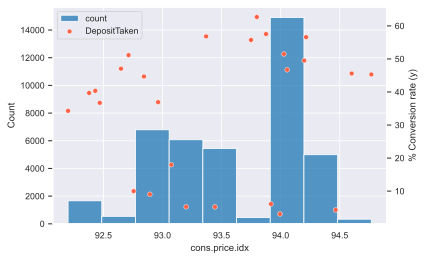

In [119]:
fig,ax=plt.subplots()
df_agg_empvar=group_for_stack('cons.price.idx',df=df_1)
sns.histplot(data=pp_df,x='cons.price.idx',bins=9,ax=ax,label='count')
ax2=ax.twinx()
ax2.grid(False)
sns.scatterplot(data=df_agg_empvar,x='cons.price.idx',y='per_y',ax=ax2,color='#FF6347',label='DepositTaken').set(ylabel='% Conversion rate (y)')
ax2.legend().set_visible(False)
fig.legend(loc="upper left",bbox_to_anchor=(0,1),bbox_transform=ax.transAxes)
#plt.suptitle('Consumer Price Index Bivariate Analysis', x=0.05, ha='left', fontsize=13)
plt.savefig('consprice.png',dpi=300, transparent=True)

**cons.conf.idx**

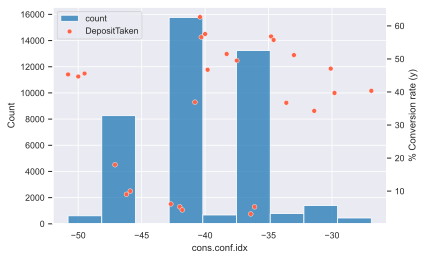

In [120]:
fig,ax=plt.subplots()
df_agg_empvar=group_for_stack('cons.conf.idx',df=df_1)
sns.histplot(data=pp_df,x='cons.conf.idx',bins=9,ax=ax,label='count')
ax2=ax.twinx()
ax2.grid(False)
sns.scatterplot(data=df_agg_empvar,x='cons.conf.idx',y='per_y',ax=ax2,color='#FF6347',label='DepositTaken').set(ylabel='% Conversion rate (y)')
ax2.legend().set_visible(False)
fig.legend(loc="upper left",bbox_to_anchor=(0,1),bbox_transform=ax.transAxes)
#plt.suptitle('Consumer Confidence Index Bivariate Analysis', x=0.05, ha='left', fontsize=13)
plt.savefig('consconf.png',dpi=300, transparent=True)

**euribor3m**

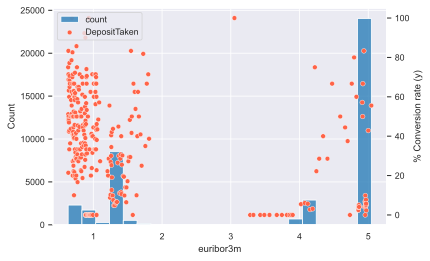

In [121]:
fig,ax=plt.subplots()
df_agg_empvar=group_for_stack('euribor3m',df=df_1)
sns.histplot(data=pp_df,x='euribor3m',ax=ax,label='count')
ax2=ax.twinx()
ax2.grid(False)
sns.scatterplot(data=df_agg_empvar,x='euribor3m',y='per_y',ax=ax2,color='#FF6347',label='DepositTaken').set(ylabel='% Conversion rate (y)')
ax2.legend().set_visible(False)
fig.legend(loc="upper left",bbox_to_anchor=(0,1),bbox_transform=ax.transAxes)
#plt.suptitle('Euribor Interest Rate Bivariate Analysis', x=0.05, ha='left', fontsize=13)
plt.savefig('euribor3m',dpi=300, transparent=True)

**nr.employed**

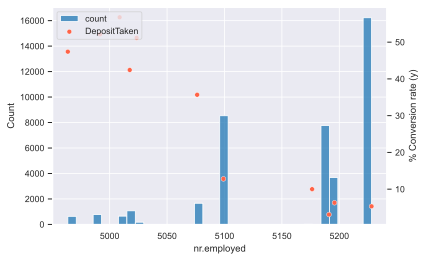

In [122]:
fig,ax=plt.subplots()
df_agg_empvar=group_for_stack('nr.employed',df=df_1)
sns.histplot(data=pp_df,x='nr.employed',ax=ax,label='count')
ax2=ax.twinx()
ax2.grid(False)
sns.scatterplot(data=df_agg_empvar,x='nr.employed',y='per_y',ax=ax2,color='#FF6347',label='DepositTaken').set(ylabel='% Conversion rate (y)')
ax2.legend().set_visible(False)
fig.legend(loc="upper left",bbox_to_anchor=(0,1),bbox_transform=ax.transAxes)
#plt.suptitle('Number of Employed Bivariate Analysis', x=0.05, ha='left', fontsize=13)
plt.savefig('nremp.png',dpi=300, transparent=True)

- We can see there is a high employee variation rate which signifies that they have made the campaign when there were high shifts in job due to conditions of economy
- It's difficult to identify the economy condition based on CPI because there aren't any information about the base year.
- Consumer confidence index is pretty low as they don't have much confidence on the fluctuating economy (There is financial crisis in 2008)
- The 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months. In our case the interest rates are quite vary
- The number of employees were also at good number which can increase their income index that could be the reason the campaign targetted the leads who were employeed to make a deposit

In [123]:
def corr_heatmap(item_vars,df=df_1,method='spearman'):
  corr=df[item_vars].corr(method=method)
  corr=round(corr,2)
  mask = np.triu(np.ones_like(corr, dtype=np.bool))
  plt.figure(figsize=(15, 8))
  heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG',linewidths=1)
  #heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':13}, pad=16,fontweight='bold')
  #plt.savefig('spearman_cor.jpg',dpi=360,bbox_inches='tight')
  #files.download("spearman_cor.jpg")

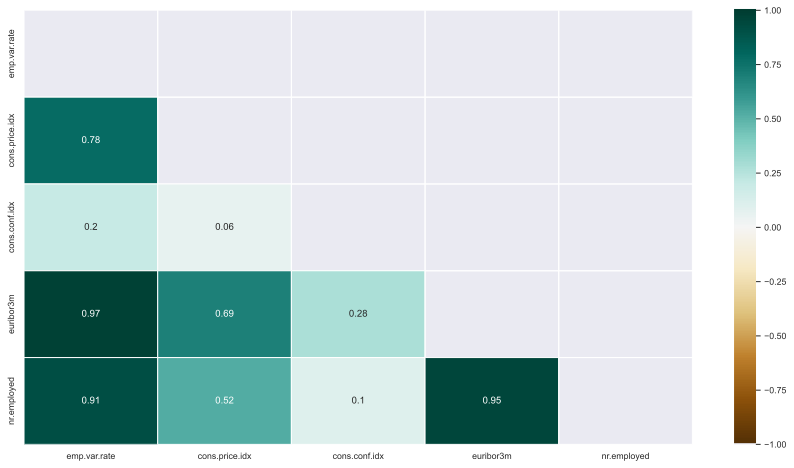

In [124]:
corr_heatmap(['month','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],df=df_2,method='pearson')
plt.savefig('corr.png',dpi=300, transparent=True)

nr.employed, euribor3m, and cons.price.idx are highly correlated to each other. It's reasonable considering they affect each other in the real condition.

## 3. Data Processing

After the data has been cleaned and analyzed, now it is ready to processed or learned by ML algorithm. To facilitate all data processing process, first let's create a function

In [153]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score, classification_report,f1_score,precision_recall_curve,roc_curve
from sklearn.model_selection import cross_val_score
from imblearn import over_sampling,under_sampling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

In [126]:

def std_numeric(item_vars,df=df_1):
  df=df.reset_index(drop=True)
  df_scale=df[item_vars]
  df=df.drop(item_vars,axis=1)
  scl_model=StandardScaler()
  scl_model.fit(df_scale)
  df_scaled=pd.DataFrame(scl_model.transform(df_scale),columns=item_vars)
  return pd.concat([df_scaled,df],axis=1)
def enc_lab(df=df_1):
  return pd.get_dummies(df,drop_first=True)
def check_vif(df_vif=df_1):
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
  vif["features"] = df_vif.columns
  return vif
def plot_confusion_matrix(cm):
  fig,ax =plt.subplots()
  sns.heatmap(cm,annot=True,fmt='.3g',cmap='Blues',ax=ax)
  ax.set_xticklabels(['Deposit no (0)','Deposit Yes (1)'])
  ax.set_yticklabels(['Deposit no (0)','Deposit Yes (1)'])
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Value')
  ax.set_ylabel('Actual Value')
def check_pca_var(item_vars,df=df_1,n_comp=3):
  pca_model=PCA(n_components=n_comp)
  pcs=pca_model.fit_transform(df[item_vars])
  list_col_name=[f'PC{x}' for x in range(n_comp)]
  pcs=pd.DataFrame(pcs,columns=list_col_name)
  print('Explained Variance ', pca_model.explained_variance_)
  print('Explained Variance Ratio', pca_model.explained_variance_ratio_)
  print('Sum all : ', pca_model.explained_variance_ratio_.sum())
  return pcs

df_1 is the data that will be processed, it contains 41176 rows and 17 columns, since 12 duplicated rows were deleted as well as some unnecessary features such as duration, housing, poutcome and pdays

In [127]:
df_1

age          job  marital            education default loan    contact  \
0       56    housemaid  married             basic.4y      no   no  telephone   
1       57     services  married          high.school   other   no  telephone   
2       37     services  married          high.school      no  yes  telephone   
3       40       admin.  married             basic.6y      no   no  telephone   
4       56     services  married          high.school      no  yes  telephone   
...    ...          ...      ...                  ...     ...  ...        ...   
41183   73      retired  married  professional.course      no  yes   cellular   
41184   46  blue-collar  married  professional.course      no   no   cellular   
41185   56      retired  married    university.degree      no  yes   cellular   
41186   44   technician  married  professional.course      no   no   cellular   
41187   74      retired  married  professional.course      no  yes   cellular   

      month day_of_week  campaign     poutcome  emp.var.rate  cons.price.idx  \
0       may         mon         1  nonexistent           1.1          93.994   
1       may         mon         1  nonexistent           1.1          93.994   
2       may         mon         1  nonexistent           1.1          93.994   
3       may         mon         1  nonexistent           1.1          93.994   
4       may         mon         1  nonexistent           1.1          93.994   
...     ...         ...       ...          ...           ...             ...   
41183   nov         fri         1  nonexistent          -1.1          94.767   
41184   nov         fri         1  nonexistent          -1.1          94.767   
41185   nov         fri         2  nonexistent          -1.1          94.767   
41186   nov         fri         1  nonexistent          -1.1          94.767   
41187   nov         fri         3      failure          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  y  
0              -36.4      4.857       5191.0  0  
1              -36.4      4.857       5191.0  0  
2              -36.4      4.857       5191.0  0  
3              -36.4      4.857       5191.0  0  
4              -36.4      4.857       5191.0  0  
...              ...        ...          ... ..  
41183          -50.8      1.028       4963.6  1  
41184          -50.8      1.028       4963.6  0  
41185          -50.8      1.028       4963.6  0  
41186          -50.8      1.028       4963.6  1  
41187          -50.8      1.028       4963.6  0  

[41176 rows x 17 columns]

In [128]:
#standardize the dataset
std_var=['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
df_1_clean=std_numeric(std_var,df=df_1)
#encode the dataset
df_1_clean=df_1_clean.drop(['contact'],axis=1) #delete contact to avoid ML bias towards unnecessary feature
df_1_clean=enc_lab(df_1_clean)
df_1_clean

age  campaign  emp.var.rate  cons.price.idx  cons.conf.idx  \
0      1.533143 -0.565963      0.648101        0.722628       0.886568   
1      1.629107 -0.565963      0.648101        0.722628       0.886568   
2     -0.290177 -0.565963      0.648101        0.722628       0.886568   
3     -0.002284 -0.565963      0.648101        0.722628       0.886568   
4      1.533143 -0.565963      0.648101        0.722628       0.886568   
...         ...       ...           ...             ...            ...   
41171  3.164534 -0.565963     -0.752402        2.058076      -2.225059   
41172  0.573501 -0.565963     -0.752402        2.058076      -2.225059   
41173  1.533143 -0.204990     -0.752402        2.058076      -2.225059   
41174  0.381573 -0.565963     -0.752402        2.058076      -2.225059   
41175  3.260499  0.155984     -0.752402        2.058076      -2.225059   

       euribor3m  nr.employed  y  job_blue-collar  job_entrepreneur  \
0       0.712463     0.331695  0                0                 0   
1       0.712463     0.331695  0                0                 0   
2       0.712463     0.331695  0                0                 0   
3       0.712463     0.331695  0                0                 0   
4       0.712463     0.331695  0                0                 0   
...          ...          ... ..              ...               ...   
41171  -1.495197    -2.815689  1                0                 0   
41172  -1.495197    -2.815689  0                1                 0   
41173  -1.495197    -2.815689  0                0                 0   
41174  -1.495197    -2.815689  1                0                 0   
41175  -1.495197    -2.815689  0                0                 0   

       job_housemaid  job_management  job_retired  job_self-employed  \
0                  1               0            0                  0   
1                  0               0            0                  0   
2                  0               0            0                  0   
3                  0               0            0                  0   
4                  0               0            0                  0   
...              ...             ...          ...                ...   
41171              0               0            1                  0   
41172              0               0            0                  0   
41173              0               0            1                  0   
41174              0               0            0                  0   
41175              0               0            1                  0   

       job_services  job_student  job_technician  job_unemployed  job_unknown  \
0                 0            0               0               0            0   
1                 1            0               0               0            0   
2                 1            0               0               0            0   
3                 0            0               0               0            0   
4                 1            0               0               0            0   
...             ...          ...             ...             ...          ...   
41171             0            0               0               0            0   
41172             0            0               0               0            0   
41173             0            0               0               0            0   
41174             0            0               1               0            0   
41175             0            0               0               0            0   

       marital_married  marital_single  education_basic.6y  \
0                    1               0                   0   
1                    1               0                   0   
2                    1               0                   0   
3                    1               0                   1   
4                    1               0                   0   
...                ...             ...                 ...  

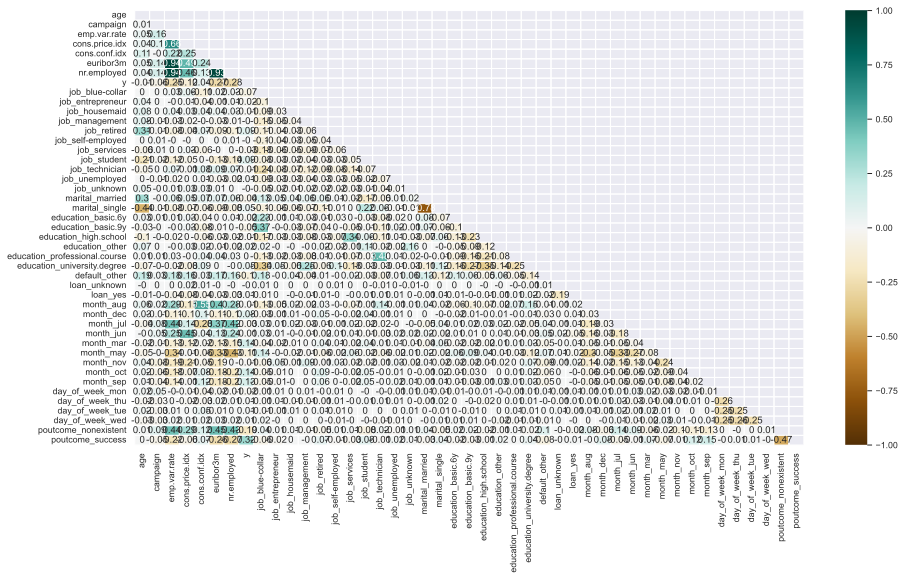

In [129]:
corr_heatmap(df_1_clean.columns.to_list(),df=df_1_clean)

In [130]:
check_vif(df_1_clean.drop(['y'],axis=1))

VIF Factor                       features
0     1.661055                            age
1     1.040572                       campaign
2   212.522316                   emp.var.rate
3    76.720519                 cons.price.idx
4     6.303000                  cons.conf.idx
5   197.429570                      euribor3m
6   186.131550                    nr.employed
7     2.789603                job_blue-collar
8     1.161834               job_entrepreneur
9     1.166561                  job_housemaid
10    1.326723                 job_management
11    1.513676                    job_retired
12    1.146822              job_self-employed
13    1.532860                   job_services
14    1.212861                    job_student
15    2.042657                 job_technician
16    1.113670                 job_unemployed
17    1.077503                    job_unknown
18    5.834716                marital_married
19    3.663188                 marital_single
20    1.500707             education_basic.6y
21    2.331677             education_basic.9y
22    3.540504          education_high.school
23    1.412804                education_other
24    2.687182  education_professional.course
25    4.589411    education_university.degree
26    1.449086                  default_other
27    1.059499                   loan_unknown
28    2.467588                       loan_yes
29    9.945709                      month_aug
30    1.189656                      month_dec
31    3.807326                      month_jul
32   10.069038                      month_jun
33    1.529197                      month_mar
34    6.326626                      month_may
35    3.615030                      month_nov
36    1.759939                      month_oct
37    2.088747                      month_sep
38    2.019429                day_of_week_mon
39    2.027880                day_of_week_thu
40    1.987677                day_of_week_tue
41    1.989087                day_of_week_wed
42    9.650769           poutcome_nonexistent
43    1.442015               poutcome_success

Based on correlation heatmap and VIF table, one can easily see that euribor3m, nr.employed and emp.var.rate are highly correlated. Few solutions can be applied to address this problem, such as feature deletion, or PCA. However, in this data processing phase, several Boosting ML algorithm will be applied, which is famous for its ability to counter overfitting. So, these features will be kept as it is for now. Last but not least, some features will be renamed because they contain . character, which can induce problem in the training process.

In [131]:
df_1_clean=df_1_clean.rename(columns={'cons.price.idx':'cons_price_idx','cons.conf.idx':'cons_conf_idx','education_basic.6y':'education_basic6y','education_basic.9y':'education_basic9y','education_high.school':'education_highschool','education_professional.course':'education_professionalcourse','education_university.degree':'education_universitydegree'})
df_1_clean

age  campaign  emp.var.rate  cons_price_idx  cons_conf_idx  \
0      1.533143 -0.565963      0.648101        0.722628       0.886568   
1      1.629107 -0.565963      0.648101        0.722628       0.886568   
2     -0.290177 -0.565963      0.648101        0.722628       0.886568   
3     -0.002284 -0.565963      0.648101        0.722628       0.886568   
4      1.533143 -0.565963      0.648101        0.722628       0.886568   
...         ...       ...           ...             ...            ...   
41171  3.164534 -0.565963     -0.752402        2.058076      -2.225059   
41172  0.573501 -0.565963     -0.752402        2.058076      -2.225059   
41173  1.533143 -0.204990     -0.752402        2.058076      -2.225059   
41174  0.381573 -0.565963     -0.752402        2.058076      -2.225059   
41175  3.260499  0.155984     -0.752402        2.058076      -2.225059   

       euribor3m  nr.employed  y  job_blue-collar  job_entrepreneur  \
0       0.712463     0.331695  0                0                 0   
1       0.712463     0.331695  0                0                 0   
2       0.712463     0.331695  0                0                 0   
3       0.712463     0.331695  0                0                 0   
4       0.712463     0.331695  0                0                 0   
...          ...          ... ..              ...               ...   
41171  -1.495197    -2.815689  1                0                 0   
41172  -1.495197    -2.815689  0                1                 0   
41173  -1.495197    -2.815689  0                0                 0   
41174  -1.495197    -2.815689  1                0                 0   
41175  -1.495197    -2.815689  0                0                 0   

       job_housemaid  job_management  job_retired  job_self-employed  \
0                  1               0            0                  0   
1                  0               0            0                  0   
2                  0               0            0                  0   
3                  0               0            0                  0   
4                  0               0            0                  0   
...              ...             ...          ...                ...   
41171              0               0            1                  0   
41172              0               0            0                  0   
41173              0               0            1                  0   
41174              0               0            0                  0   
41175              0               0            1                  0   

       job_services  job_student  job_technician  job_unemployed  job_unknown  \
0                 0            0               0               0            0   
1                 1            0               0               0            0   
2                 1            0               0               0            0   
3                 0            0               0               0            0   
4                 1            0               0               0            0   
...             ...          ...             ...             ...          ...   
41171             0            0               0               0            0   
41172             0            0               0               0            0   
41173             0            0               0               0            0   
41174             0            0               1               0            0   
41175             0            0               0               0            0   

       marital_married  marital_single  education_basic6y  education_basic9y  \
0                    1               0                  0                  0   
1                    1               0                  0                  0   
2                    1               0                  0                  0   
3                    1               0                  1                  0   
4                    1          

Pycaret will be imported to train the ML algorithm. Data will be splitted with 70%-30% portion.

In [154]:
#For Classification
from pycaret.classification import *

In [133]:
s = setup(df_1_clean, target = 'y',session_id=123)


The next step is training some ML algorithms. Since the imbalance is found being very high, AUC score will be prioritized. Keep in mind that metrics will be measured using Cross Validation in training data.

In [134]:
best_model=compare_models(exclude=['dummy','dt'],sort='AUC')

Based on above model comparison, it is evident that GBC and LGBM are the best models among others since they are able to have the highest AUC with relatively low training time.

**LGBM Base Model**

In [135]:
Lgbm=create_model('lightgbm')

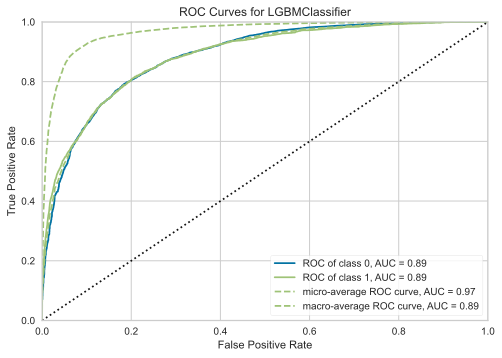

In [136]:
plot_model(Lgbm,plot='auc',use_train_data=True)

In [155]:
import shap
from sklearn.metrics import roc_curve

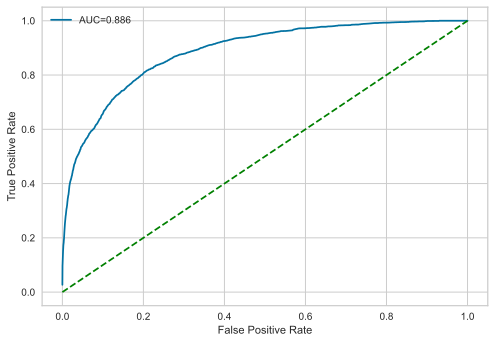

In [138]:
#Recreate the same ROC curve using matplotlib
X_train=get_config('X_train')
predict_train=predict_model(Lgbm,X_train,raw_score=True)
predict_train['y']=get_config('y_train')
fpr, tpr, _ = roc_curve(predict_train.y,  predict_train.Score_1)
auc = roc_auc_score(predict_train.y, predict_train.Score_1)
fig,ax=plt.subplots()
sns.lineplot(fpr,tpr,label="AUC="+str(round(auc,3))).set(xlabel='False Positive Rate',ylabel='True Positive Rate')
sns.lineplot([0, 1], [0, 1], color='green', linestyle='--')
plt.savefig('ROC_LGBM.png',dpi=300,transparent=True)

**GBC Base Model**

In [139]:
best_model=create_model('gbc')

Overall, the AUC of both models are pretty decent. However, there is still imbalance between precision and recall metrics in both models. Moreover, the AUC score of LGBM model for training data is 0.89, quite higher than what in test data, i.e 0.794, which appears as a sign of overfitting. To fix these problems, hyperparameter tuning will be conducted by using RandomSearchCV.

**LGBM Hyperparameter tuning**

In [140]:
np.random.seed(40)
params={'max_depth':[x for x in range(3,13)], #adjust the tree to avoid overfitting
        'num_leaves':np.arange(20,310,10), #adjust the tree to avoid overfitting
        'learning_rate':np.arange(0.05,0.35,0.05), #adjust the overfitting penalty
        'min_child_samples':np.arange(30,200,20), #adjust the tree to avoid overfitting
        'n_estimators':np.arange(100,350,50), #iteration adjusting
        'reg_alpha':np.random.uniform(0,30,size=(15,)), #adjust the overfitting penalty
        'reg_lambda':np.random.uniform(0,30,size=(15,)), #adjust the overfitting penalty
        'bagging_fraction':np.arange(0.3,0.9,0.1), #increase the model performance
        'feature_fraction':np.arange(0.3,0.9,0.1), #increase the model performance
        'bagging_freq':np.arange(1,10,1), #increase the model performance
        'scale_pos_weight':[1.8,1.9,1.85] #label balancing, positive weight scaling
        }

tuned_lgbm,tuner = tune_model(Lgbm,optimize='AUC',n_iter=50,custom_grid=params,return_tuner=True,fold=10)

**GBC Hyperparameter Tuning**

In [141]:
np.random.seed(42)
params={'max_depth':[x for x in range(3,13)], #adjust the tree to avoid overfitting
        'learning_rate':np.arange(0.05,0.35,0.05), #adjust the learning rate to avoid overfitting
        'n_estimators':np.arange(100,350,50), #increase iteration
        'max_features':[2,3,4,5,6,7,8,'sqrt'], #adjust the tree to avoid overfitting
        'min_samples_split':[2,4,6,8,10,20,40,60,100], #adjust the tree to avoid overfitting
        'min_samples_leaf':[1,3,5,7,9] #adjust the tree to avoid overfitting
        }
tuned_xgb,tuner = tune_model(best_model,optimize='AUC',n_iter=40,custom_grid=params,return_tuner=True,fold=8)

LGBM has feature to adjust the scale of positive label, thus the dataset imbalance can be countered by adjusting that parameter. However, GBC does not have this feature, that's why Recall-Precision metrics in LGBM are more balanced than what in GBC. Moreover, by looking at AUC metric alone, it is obvious that LGBM is the best model we get here.

In [142]:
print(tuned_lgbm)

LGBMClassifier(bagging_fraction=0.9000000000000001, bagging_freq=1,
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.6000000000000001, importance_type='split',
               learning_rate=0.1, max_depth=4, min_child_samples=170,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=150,
               n_jobs=-1, num_leaves=20, objective=None, random_state=123,
               reg_alpha=13.510517609018134, reg_lambda=20.09384341840833,
               scale_pos_weight=1.8, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


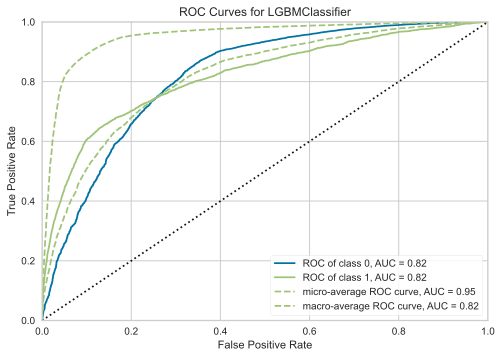

In [143]:
plot_model(tuned_lgbm,plot='auc',use_train_data=True)

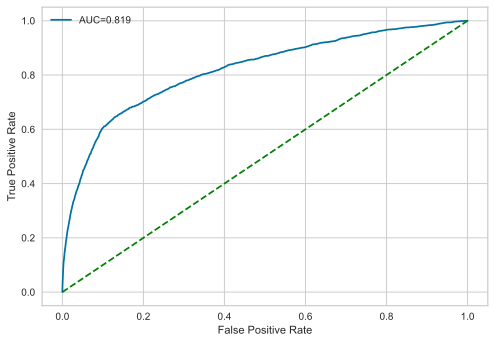

In [144]:
#create the same plot using matplotlib
predict_train=predict_model(tuned_lgbm,X_train,raw_score=True)
predict_train['y']=get_config('y_train')
fpr, tpr, _ = roc_curve(predict_train.y,  predict_train.Score_1)
auc = roc_auc_score(predict_train.y, predict_train.Score_1)
fig,ax=plt.subplots()
sns.lineplot(fpr,tpr,label="AUC="+str(round(auc,3))).set(xlabel='False Positive Rate',ylabel='True Positive Rate')
sns.lineplot([0, 1], [0, 1], color='green', linestyle='--')
plt.savefig('ROC_LGBM.png',dpi=300,transparent=True)

After the hyperparameter tuning was conducted, the AUC of training data reduces to 0.82, proving that the tuning is success on solving the overfitting problem. Now, we can apply the LGBM model to predict the test data.

## 4. Model Evaluation and Conclusion

In [145]:
def conv_rate_calculator(test_data,vars_prob='Score_1'):
  Test_df=test_data
  nrow=Test_df.shape[0]
  print(f'Random Method with {int(nrow*0.4)} calls')
  df_random=Test_df.sample(n=int(nrow*0.4),random_state=41)
  print('Conversion rate :')
  print(f'{round(df_random.y.sum()*100/df_random.y.count(),2)}% ({df_random.y.sum()})')
  print('Profit assumption (2$ cost , 50$ revenue for each customer) :')
  print(f'{df_random.y.sum()*50}$ (Rev) - {int(nrow*0.4)*2}$ (Cost) = {df_random.y.sum()*50-int(nrow*0.4)*2}$ (Profit) ')
  print('=====================================================================')
  print(f'By model with {int(nrow*0.4)} calls')
  test_df_sort=Test_df.sort_values(by=vars_prob,ascending=False).head(int(nrow*0.4))
  print('Conversion rate :')
  print(f'{round(test_df_sort.y.sum()*100/test_df_sort.y.count(),2)}% ({test_df_sort.y.sum()})')
  print('Profit assumption (2$ cost , 50$ revenue for each customer) :')
  print(f'{test_df_sort.y.sum()*50}$ (Rev) - {int(nrow*0.4)*2}$ (Cost) = {test_df_sort.y.sum()*50-int(nrow*0.4)*2}$ (Profit) ')

First, let's see the how well our tuned model when applied on test data

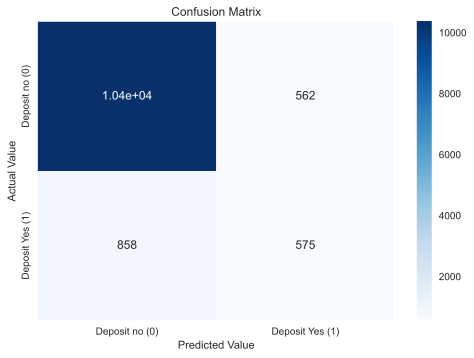

In [146]:
predict_test=predict_model(tuned_lgbm,raw_score=True)
plot_confusion_matrix(confusion_matrix(predict_test.y,predict_test.Label))
plt.savefig('cm_tuned_lgbm.png',dpi=300,transparent=True)

We can see that our best model have pretty balanced performance on Recall and Precision score, with AUC 79.8%. This balanced Recall and Precision score is obviously better than model with higher Precision but low Recall, since the loss of losing 1 depositors is 50 dollars meanwhile the loss of calling wrong depositors is only 2 dollars. To prove this look at below examples. From the result of tuned XGB on test data, it is evident that the Precision is significantly higher than the score of its Recall. If we calculate both examples (tuned LGBM and XGB) using 50 dollars profit and 2 dollars cost as stated before, the bank will get 26476 dollars profit. However, that profit decreases significantly on the latter example, which only gives bank 16890 dollars. These calculations are calculated using 25 times profit-cost assumption, which is probably higher in the real application.

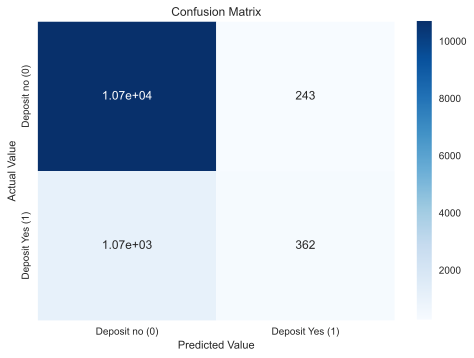

In [147]:
predict_test_base=predict_model(tuned_xgb,raw_score=True)
plot_confusion_matrix(confusion_matrix(predict_test_base.y,predict_test_base.Label))
plt.savefig('cm_based_gb.png',dpi=300,transparent=True)

Another interesting thing to be calculated is how effective the marketing will be after applying this ML model. To conduct this another calculation, it is assumed that the company's budget is only enough to call 40% of total clients on the test data.

In [148]:
conv_rate_calculator(predict_test,vars_prob='Score_1')

Random Method with 4941 calls
Conversion rate :
11.11% (549)
Profit assumption (2$ cost , 50$ revenue for each customer) :
27450$ (Rev) - 9882$ (Cost) = 17568$ (Profit) 
By model with 4941 calls
Conversion rate :
22.42% (1108)
Profit assumption (2$ cost , 50$ revenue for each customer) :
55400$ (Rev) - 9882$ (Cost) = 45518$ (Profit) 


From this calculation , we can see that the conversion rate increases over than 100% from 11.11% to 22.42%. Meanwhile, the profits by 20 times profit-cost assumption raises 2.6 times higher from 17.6K to 45.5K dollars. These increases are absolutely significant compared to the results of previous random call approach. Keep in mind that this model are built realistically by dropping unnecessary features such as contact and duration (leakage).

Now, let's observe how this model understand the data.

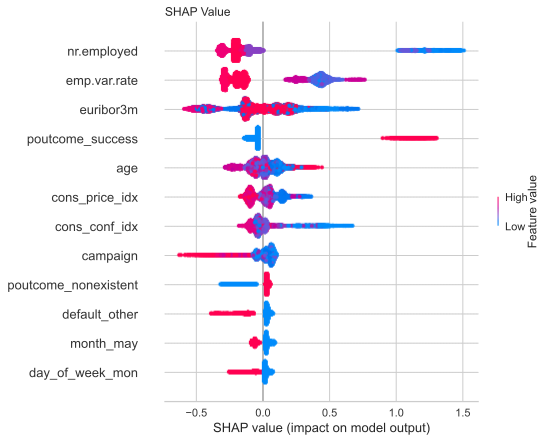

In [150]:
X_test=get_config('X_test')
explainer=shap.Explainer(tuned_lgbm)
shap_values=explainer.shap_values(X_test)
shap_obj=explainer(X_test)
shap.summary_plot(shap_values[1], X_test, plot_type='dot',max_display=12,show=False)
plt.title('SHAP Value',loc='left')
plt.tight_layout()
plt.savefig('shap2.png',dpi=1000,transparent=True)

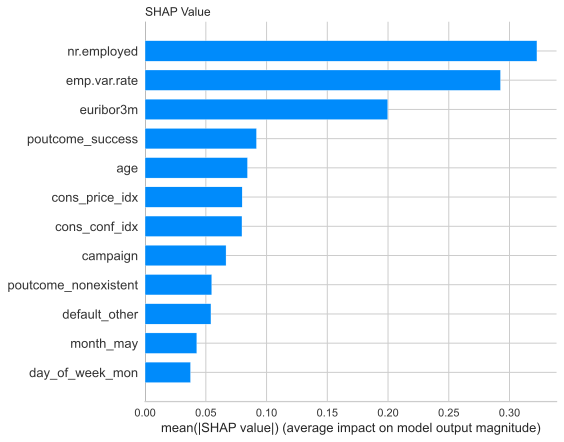

In [151]:
shap.summary_plot(shap_values[0], X_test, plot_type='bar',max_display=12,show=False)
plt.title('SHAP Value',loc='left')
plt.tight_layout()
plt.savefig('shap1.png',dpi=1000,transparent=True)

From SHAP value plot above, one can see that the results is quite consistent to the previous results we obtain in EDA process. The variables are sorted descendingly based on their contribution, which color indicates the value level of the feature (red means high, blue means low -> 100 in age will be labelled by red, meanwhile 18 is labelled by blue) and SHAP value measures the impact of that value level to the outcomes, for example, if the age is positively correlated to the subscription probability, red will be on the chart's positive side and blue in the negative side.

- From the plot, 3 features with the most contribution are sos-con variables nr.employed, emp.var.rate and euribor3m. The plot depicts that when nr.employed are pretty low, the subscription probability increases and otherwise. The insights of euribor3m and emp.var.rate are less clear, even though we can understand higher emp.var.rate means lower probability and lower euribor3m means higher probability in overall.

- Younger and older clients tend to have higher probability to subscribe which result is similar to the previous EDA analysis. As well as poutcome and campaign.

- Lower value of consumer price index and confidence index results in higher probability to subscribe. 

- May (month) and Monday (day) give smaller subscription probability.



### 4.1 Conclusion and Disclaimer

From all results, we can conclude that :

- The most important features based on our model are Sos-Con attributes, outcome of the previous campaign, client's age, and total calls in the current campaign. To get more conversion rate, Bank should focus its campaign on certain circumstances based on those Sos-Con attributes. For example, lower nr.employed induces higher subscription probability, meanwhile high emp.var.rate results in lower subscription probability. Full explanation on this attributes can bee seen in the previous section and SHAP graph. Other recommendation is bank should target clients who were pitched succesfully in the last campaign more, since they are more likely to be depositor. And, it's better not to focus too much on customer who required many calls from the Bank, since the higher the campaign, the less subscription probability will be. Similar to the previous statement in EDA analysis, younger and elder clients somehow have higher subscription probability than customer whose age ranged from 30-55 approximately. 

- Tuned LGBM model increases the conversion rate almost 100% compared to the result of random-call marketing strategy, from 11% to 22% approximately (data simulation). Based on 20 times profit-cost assumption, the profit for using this algorithm increase 2.6 times higher from 17.6K to 45.5K dollars. Keep in mind that this model are built realistically by dropping unnecessary features such as contact and duration (leakage).

However, there is a disclaimer though. The case study coincides with 2008 financial crisis, which could mean that the model are biased to some degree by the prevailing social-economy condition and make our results become less representative on normal condition.